El objetivo de este notebook es para hacer un prgrama que nos diga cuanto debemos ahorar para llegar a cierta meta de retiro

La premisa es, miestras estemos en nuestra vida laboral permaneceramos inviertiendo un porcentaje de nuestro fondo en dueda del gobierno (cetes) y el otro porcentaje en la bolsa mexicana de valores.

Para hacer los calculos necesitamos saber dos cosas, los intereses de los cetes la inflacion y los intereses de la bolsa.
Siguiendo el razonamiento como esta descrito en Investing Desm.... capitulo 10.
Tenemos que averiguar cuales son los rendimientos reales de cetes y del IPC.

In [1]:
import pandas as pd
import io
import requests
import io
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Para averiguar el de cetes tomaremos la inflacion y los rendimientos historicos de cetes
post_infla = {'formatoCSV.x': '44',
             'series': 'SP30577',
             'version': '2'}
url = 'http://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarSeries'
inflacion_cont = '\n'.join(requests.post(url, data=post_infla).content.split('\n')[12:])
inflacion_data =pd.read_csv(io.StringIO(inflacion_cont.decode('utf-8')), names=['fecha', 'inflacion'], na_values='N/E')
inflacion_data['fecha'] = inflacion_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
inflacion_data.set_index('fecha', inplace=True)
inflacion_data['inflacion'] = inflacion_data.inflacion.astype(float)


In [3]:
# Cargando los redimientos de cetes
post_cetes = {'formatoCSV.x': '57',
             'series': 'SF43936',
             'version': '2'}
cetes_cont = '\n'.join(requests.post(url, data=post_cetes).content.split('\n')[12:])
cetes_data =pd.read_csv(io.StringIO(cetes_cont.decode('utf-8')), names=['fecha', 'cetes'], na_values='N/E')
cetes_data['fecha'] = cetes_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
cetes_data = cetes_data.loc[cetes_data.fecha > datetime.date(1999, 12, 31)]
cetes_data.set_index('fecha', inplace=True)
cetes_data['cetes'] = cetes_data.cetes.astype(float) * 0.84

In [4]:
inflacion_data = inflacion_data.resample('MS').mean()

In [5]:
cetes_data = cetes_data.resample('MS').mean()

In [6]:
result = inflacion_data.merge(cetes_data, left_index=True, right_index=True, how='inner')

In [7]:
result['cetes_real'] = result['cetes']/12-result['inflacion']

In [8]:
result['cetes_real'].describe()


count    209.000000
mean       0.088586
std        0.379401
min       -1.291900
25%       -0.167740
50%        0.053500
75%        0.324200
max        1.283975
Name: cetes_real, dtype: float64

Is this real life, nooooo god noooooooooooooo!

In [9]:
plot_me = result[['cetes']]/12
plot_me['inflacion'] = result.inflacion

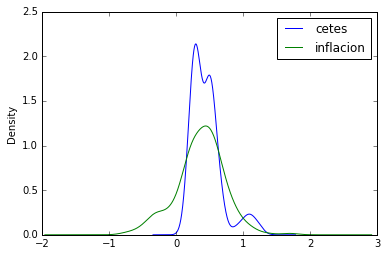

In [10]:
plot_me.plot(kind='kde')

In [11]:
plot_me.describe()

,cetes,inflacion
count,209.000000,209.000000
mean,0.453035,0.364450
std,0.230207,0.359922
min,0.187075,-0.740000
25%,0.294350,0.170000
50%,0.423220,0.400000
75%,0.520940,0.580000
max,1.251950,1.700000


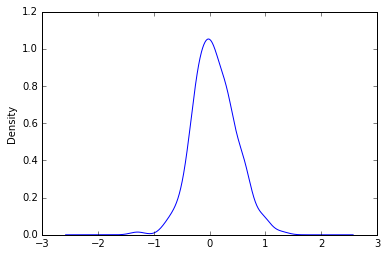

In [12]:
result.cetes_real.plot(kind='kde')

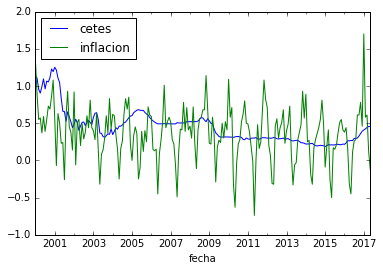

In [13]:
plot_me.plot()

Veamos con el IPC

In [14]:
plot_me.tail(20)

,cetes,inflacion
fecha,,
2015-10-01,0.211260,0.51
2015-11-01,0.211050,0.55
2015-12-01,0.219940,0.41
2016-01-01,0.215775,0.38
2016-02-01,0.235200,0.44
2016-03-01,0.266000,0.15
2016-04-01,0.261975,-0.32
2016-05-01,0.266875,-0.45
2016-06-01,0.266420,0.11


In [15]:
# Cargando los redimientos de cetes
ipc_cetes = {'formatoCSV.x': '74',
             'series': 'SF4782',
             'version': '2',
             'tipoInformacion': '4,2'}
ipc_cont = '\n'.join(requests.post(url, data=ipc_cetes).content.split('\n')[12:])
ipc_data =pd.read_csv(io.StringIO(ipc_cont.decode('utf-8')), names=['fecha', 'ipc'], na_values='N/E')
ipc_data['fecha'] = ipc_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
ipc_data.set_index('fecha', inplace=True)
ipc_data['ipc'] = ipc_data.ipc.astype(float)

In [16]:
ipc_data.describe()

,ipc
count,436.000000
mean,2.915161
std,10.070833
min,-43.190000
25%,-2.522500
50%,1.845000
75%,7.657500
max,43.670000


In [17]:
result['ipc_real'] = ipc_data.ipc - result.inflacion

In [18]:
ipc_result = ipc_data.merge(inflacion_data, left_index=True, right_index=True, how='inner')

In [19]:
ipc_result.head()

,ipc,inflacion
fecha,,
1981-01-01,NaN,3.22
1981-02-01,-4.76,2.46
1981-03-01,-4.29,2.14
1981-04-01,-1.49,2.26
1981-05-01,-7.58,1.51


In [20]:
ipc_result['ipc_real'] = ipc_result.ipc - ipc_result.inflacion
ipc_result.ipc_real.describe()

count    436.000000
mean       1.207683
std        9.722938
min      -51.120000
25%       -3.585000
50%        1.010000
75%        6.057500
max       35.330000
Name: ipc_real, dtype: float64

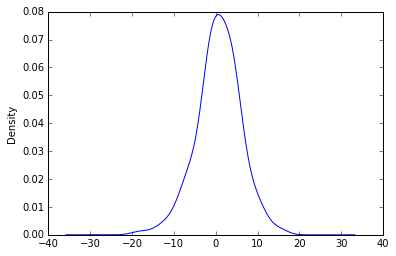

In [21]:
result.ipc_real.plot(kind='kde')

Just playing

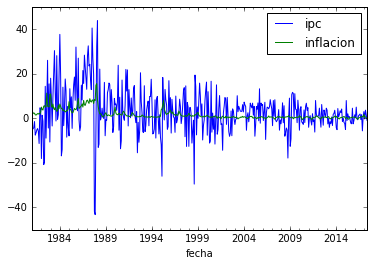

In [22]:
ipc_result[['ipc', 'inflacion']].plot()

Ahora veamos que onda con las afores
http://www.consar.gob.mx/gobmx/aplicativo/siset/Series.aspx?cd=147&cdAlt=False
http://www.consar.gob.mx/gobmx/aplicativo/siset/Enlace.aspx?md=18

In [23]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

import time
time.strptime('jul-03', '%b-%YY')

In [24]:
def two_year_to_full(x):
    partial = int(x)
    if partial < 67:
        result = 2000 + partial
    else:
        result = 1900 + partial
    return str(result)
def string_to_date(x):
    partial = x[-2:]
    date_string = x[:4] + two_year_to_full(partial)
    return datetime.datetime.strptime(date_string, '%b-%Y')

In [25]:
sura = pd.read_csv('../files/rendimientos_bolsa_basi_nomi_histo.csv', skiprows=9)

In [26]:
sura = sura.transpose().iloc[4:].reset_index().rename(columns={'index':'fecha', 0:'sura'})

In [27]:
sura['fecha'] = sura.fecha.map(string_to_date)
sura = sura.set_index('fecha')
sura['sura'] = sura.sura.astype(float)
sura.head()

,sura
fecha,
1998-07-01,22.15
1998-08-01,20.56
1998-09-01,20.82
1998-10-01,22.72
1998-11-01,23.93


In [28]:
sura.iloc[-24:].sura.describe()

count    24.000000
mean     11.441250
std       0.299076
min      11.050000
25%      11.105000
50%      11.440000
75%      11.622500
max      12.000000
Name: sura, dtype: float64

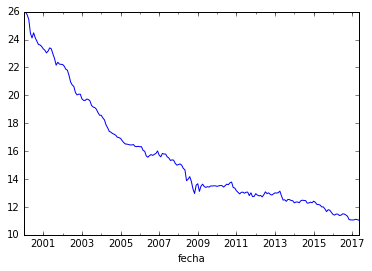

In [29]:
sura[18:].sura.plot()

In [30]:
  from scipy.optimize import curve_fit

In [31]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

In [32]:
import numpy as np

In [33]:
initial = 25
points_num = len(np.array(sura[initial:].sura))

In [34]:
p0=(26,0.005,10)
popt, pcov = curve_fit(func, range(points_num), np.array(sura[initial:].sura), p0)

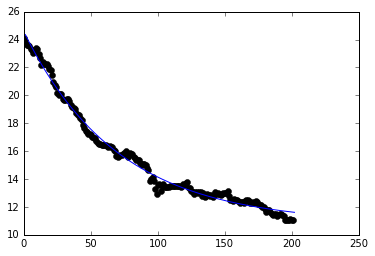

In [35]:
popt

xx = np.linspace(1, points_num, points_num)

yy = func(xx, *popt)
plt.plot(range(points_num), np.array(sura[initial:].sura), 'ko')
plt.plot(xx,yy)

In [36]:
afore_data = sura[initial:].copy()
afore_data['ajuste'] = yy

In [37]:
afore_data['delta'] = afore_data.sura - afore_data.ajuste

In [38]:
afore_data.delta.describe()

count    202.000000
mean       0.064054
std        0.358216
min       -1.174403
25%       -0.222222
50%        0.091162
75%        0.311406
max        0.798399
Name: delta, dtype: float64

In [39]:
#afore_data['real'] = afore_data.sura/12-result['inflacion']
afore_data = afore_data.merge(inflacion_data, right_index=True, left_index=True, how='inner')

In [40]:
afore_data.head()

,sura,ajuste,delta,inflacion
fecha,,,,
2000-08-01,24.13,24.355702,-0.225702,0.55
2000-09-01,23.89,24.164306,-0.274306,0.73
2000-10-01,23.64,23.975621,-0.335621,0.69
2000-11-01,23.61,23.789608,-0.179608,0.86
2000-12-01,23.50,23.606230,-0.106230,1.08


In [41]:
afore_data.inflacion.median()

0.39

In [42]:
afore_data['real'] = (afore_data.sura-1.03)/12 - afore_data.inflacion

In [43]:
data = np.array(afore_data.real)
points_num = len(data)
p0=(2,0.005,1)
popt, pcov = curve_fit(func, range(points_num), data, p0)

In [101]:
popt

array([ 0.9965932 ,  0.01129463,  0.44635576])

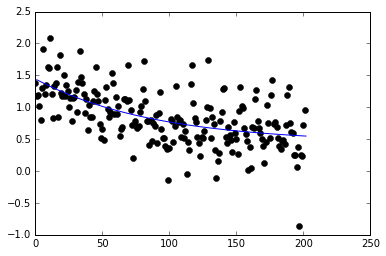

In [45]:
xx = np.linspace(1, points_num, points_num)

yy = func(xx, *popt)
plt.plot(range(points_num), data, 'ko')
plt.plot(xx,yy)

In [46]:
afore_data['ajuste'] = yy
afore_data['delta'] = afore_data.real - afore_data.ajuste
afore_data.delta.describe()

count    202.000000
mean       0.004430
std        0.358515
min       -1.417008
25%       -0.212192
50%       -0.032817
75%        0.183576
max        1.066612
Name: delta, dtype: float64

Por lo tanto el afore tiene 0.53 de interes mensual con una desviacion estandar de 0.35, el de cetes es de 0.0535 con una desviacion de 0.379

In [47]:
result['cetes_real'].std()

0.37940070317796115

In [125]:
payment = 19000
ret_age = 65
til_age = 90

In [126]:
import random

In [127]:
N = (til_age - ret_age)*12
present_value = payment * (1 - (1 + result['cetes_real'].median()/100)**(-N))/(result['cetes_real'].median()/100)

In [128]:
present_value

5264797.763686447

In [135]:
def simulate(rate, error, periods, initial, payment, size=1000):
    names = ['sim_' + str(x) for x in range(1, size +1)]
    sim_data = pd.DataFrame(columns=names)
    initials = [initial] * size
    sim_data.loc[0] = initials
    for per in xrange(1, periods+1):
        sim_data.loc[per] = sim_data.loc[per-1].apply(lambda x: (x*(1+random.gauss(rate, error))) + payment)
    
    return sim_data

hey = simulate(result['cetes_real'].median()/100,result['cetes_real'].std()/100, N , 5450000, -19000, 1000)

In [136]:
np.percentile(hey.iloc[-1].values, 20)

8480.849639285989

c = (r / (1 - (1 + r)^-N))P 

In [137]:
my_age = 30
afore_ratio = 0.8
initial = 90000
payment = 4000

In [138]:
N = (ret_age-my_age)*12
afore_sim = simulate(popt[-1]/100,afore_data.delta.std()/100, N , initial*afore_ratio, payment*(afore_ratio), 1000)
cetes_sim = simulate(result['cetes_real'].median()/100, result['cetes_real'].std()/100, N , initial*(1-afore_ratio), payment*(1 - afore_ratio), 1000)

In [141]:
np.percentile(afore_sim.iloc[-1].values, 20) + np.percentile(cetes_sim.iloc[-1].values, 20)

4593850.4964723485

ok esto no se ve nada bien, creo que me voy a ir a anual

In [51]:
post_infla = {'formatoCSV.x': '58',
             'series': 'SP30578',
             'version': '2'}
url = 'http://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarSeries'
inflacion_cont = '\n'.join(requests.post(url, data=post_infla).content.split('\n')[12:])
inflacion_data =pd.read_csv(io.StringIO(inflacion_cont.decode('utf-8')), names=['fecha', 'inflacion'], na_values='N/E')
inflacion_data['fecha'] = inflacion_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
inflacion_data.set_index('fecha', inplace=True)
inflacion_data['inflacion'] = inflacion_data.inflacion.astype(float)

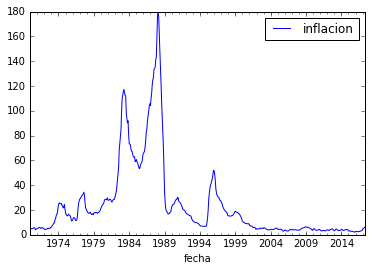

In [52]:
inflacion_data.plot()